<a href="https://colab.research.google.com/github/salsaaakusuma/Analisis-Sentimen-SWOT/blob/main/WORD_CL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install wordcloud

In [ ]:
import pandas as pd
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import re
from collections import Counter

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
data = pd.read_csv('data_wc.csv')
data.head(5)

,ID,Username,Text,Created At,Cleansing,Case_Folding,Normalized_Text,Tokenizing,Stemming,Sentiment
0,coc_1,sprintgkle,Clash of champions ini cast nya punya beragam ...,17 Juni 2024,Clash of champions ini cast nya punya beragam ...,clash of champions ini cast nya punya beragam ...,clash of champions ini cast nya punya beragam ...,"['clash', 'of', 'champions', 'ini', 'cast', 'n...","['clash', 'of', 'champions', 'ini', 'cast', 'n...",Positif
1,coc_2,coldzonkbie,gue suka bgt sm university war - terus gamau b...,17 Juni 2024,gue suka bgt sm university war terus gamau ber...,gue suka bgt sm university war terus gamau ber...,saya suka banget sama university war terus tid...,"['saya', 'suka', 'banget', 'sama', 'university...","['saya', 'suka', 'banget', 'sama', 'university...",Positif
2,coc_3,Q_Nyitt,UGM -&gt; Matematika -&gt; IPK 4.0 Kek nya ser...,18 Juni 2024,UGM gt Matematika gt IPK Kek nya seru nih nont...,ugm gt matematika gt ipk kek nya seru nih nont...,ugm gitu matematika gitu ipk seperti nya seru ...,"['ugm', 'gitu', 'matematika', 'gitu', 'ipk', '...","['ugm', 'gitu', 'matematika', 'gitu', 'ipk', '...",Positif
3,coc_4,todayis__gaby,Clash of champions seru juga degdegannya ada b...,29 Juni 2024,Clash of champions seru juga degdegannya ada b...,clash of champions seru juga degdegannya ada b...,clash of champions seru juga degdegannya ada b...,"['clash', 'of', 'champions', 'seru', 'juga', '...","['clash', 'of', 'champions', 'seru', 'juga', '...",Positif
4,coc_5,yourjungx,abis nonton clash of champions terus champions...,29 Juni 2024,abis nonton clash of champions terus champions...,abis nonton clash of champions terus champions...,habis menonton clash of champions terus champi...,"['habis', 'menonton', 'clash', 'of', 'champion...","['habis', 'tonton', 'clash', 'of', 'champions'...",Positif


In [ ]:
def combine_text_by_sentiment(data, sentiment):
    combined_text = ' '.join([' '.join(eval(row)) for row in data[data['Sentiment'] == sentiment]['Stemming']])
    return combined_text

text_positif = combine_text_by_sentiment(data, 'Positif')
text_negatif = combine_text_by_sentiment(data, 'Negatif')

In [ ]:
def remove_stopwords(text, language='indonesian'):
    stop_words = set(stopwords.words(language))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

text_positif_clean = remove_stopwords(text_positif)
text_negatif_clean = remove_stopwords(text_negatif)

In [ ]:
from collections import Counter

def count_word_frequencies(text):
    words = text.split()
    word_frequencies = Counter(words)
    return word_frequencies

frequencies_positif = count_word_frequencies(text_positif_clean)
frequencies_negatif = count_word_frequencies(text_negatif_clean)

In [ ]:
def generate_unique_wordcloud(text, title):
    word_frequencies = Counter(text.split())

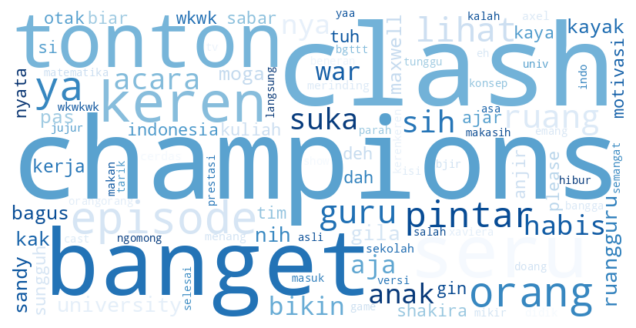

In [ ]:
wordcloud_positif = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Blues',
    max_words=100,
    collocations=False
).generate(text_positif_clean)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_positif, interpolation='bilinear')
plt.axis('off')
plt.show()

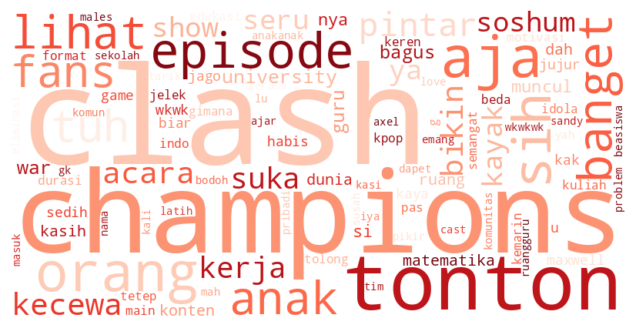

In [ ]:
wordcloud_negatif = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Reds',
    max_words=100,
     collocations=False
).generate(text_negatif_clean)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud_negatif, interpolation='bilinear')
plt.axis('off')
plt.show()